<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 1 / NOTE 2*

# 📝 Assignment
---

# 🌱 **기본 과제**

이번 과제에서도 n211 과제에서 다루었던 housing price dataset을 가지고 배운 내용을 연습해 보겠습니다. 

과제에서 사용할 데이터셋은 다음 링크에서 다운로드 받을 수 있습니다.

   - [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction?select=kc_house_data.csv)

## **Part 1. Validation**

### 1-1. 3-way holdout Method

- 다운로드 한 훈련 데이터를 훈련/검증/테스트 세트로 나누어 주세요.
- 타겟 특성을 확인하고 타겟 변수를 나누어 줍니다.
- `train_test_split()`을 사용하여 전체 데이터를 훈련과 테스트 데이터로 나누어 주세요. 
  - 훈련과 테스트 데이터는 8:2의 비로 나눕니다.
  - `random_state=2`로 설정합니다. 
- `train_test_split()`을 사용하여 훈련 데이터를 훈련과 검증 데이터로 나누어 주세요.
  - 훈련과 검증 데이터는 8:2의 비로 나눕니다.
  - `random_state=2`로 설정합니다.

##### **Q1. 데이터를 분리하고 난 후 검증 세트(X_val)의 개수를 제출하세요.**

In [1]:
# 데이터셋을 불러옵니다. 

import pandas as pd
import numpy as np

df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [2]:
# 컬럼 확인
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [3]:
from sklearn.model_selection import train_test_split

target = 'price'
features = ['bedrooms', 'bathrooms', 'sqft_living']

In [4]:
# solution
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2)


print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(13832, 3) (13832,)
(3458, 3) (3458,)
(4323, 3) (4323,)


In [5]:
X_val.shape[0]

3458

##### **Q2. 선형회귀모델을 만들어보고 RMSE를 사용한 훈련 점수와 검증 점수의 차를 구하고 제출하세요. (소수점 아래 2자리까지)**
- 모델을 만들기 전에 평균 기준모델을 만들고 확인해보세요.
- 선형회귀모델을 만들어보고 훈련 점수와 검증 점수를 비교해보세요.
- 마지막으로 test set를 사용해서 모델의 일반화 성능을 확인해보세요.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# solution
baseline = [y_train.mean()] * len(y_train)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# rmse = mean_squared_error(squared=False)
baseline_score = mean_squared_error(baseline, y_train, squared=False)
train_score = mean_squared_error(y_train_pred, y_train, squared=False)
val_score = mean_squared_error(y_val_pred, y_val, squared=False)
test_score = mean_squared_error(y_test_pred, y_test, squared=False)

print(baseline_score, train_score, val_score, test_score)
round(train_score - val_score, 2)

367846.0990657101 257653.37363570312 256024.3912741447 259822.31414408985


1628.98

### **1-2. Cross_validation**

- **1-1**과 동일한 조건으로 데이터를 다시 train set과 test set으로만 나누세요.
- 교차검증을 통해 나온 결과를 제출하세요.
  - sklearn의 `cross_val_score` 라이브러리를 사용하세요.
  - **10-fold** cross validation을 수행하세요.
  - cv 수행 시 scoring metric은 **RMSE** 로 연산하도록 설정해주세요.
  


##### **Q3. 결과를 평균 낸 값의 절대값을 제출해주세요.**

In [7]:
# solution
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X, y, test_size=0.2, random_state=2)

print(X_train_cv.shape, X_test_cv.shape)

(17290, 3) (4323, 3)


In [8]:
from sklearn.model_selection import cross_val_score

cv_results = cross_val_score(
    model, 
    X_train_cv, 
    y_train_cv, 
    cv=10,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
    )

print(np.abs(cv_results.mean()).round(2))
print(np.abs(np.mean(cv_results)).round(2))

257024.15
257024.15


## **Part 2. Overfit/Underfit**



### **2-1. 과적합**

- 다항선형회귀를 만들고 최적의 `차수(degree)`를 찾아보세요.
  - 주어진 리스트 `degree` 요소 중에서 검증 에러가 가장 낮은 차수를 찾아보세요.
  - 에러를 비교하기 위한 평가지표는 자유롭게 사용해도 좋습니다.
  - 훈련 에러와 검증 에러를 `train_error`와 `val_error`에 담아보세요
  - 아래 주석을 풀고 `Learning curve`를 그려보세요.


##### **Q4. 다항선형회귀를 만들고 최적의 차수를 찾아 제출해주세요.**

In [9]:
from matplotlib import pyplot as plt

degrees = [1, 2, 3, 4, 5]

best_degree = None

# plt.plot(train_error, color='blue');
# plt.plot(val_error, color='orange');
# plt.xticks(range(len(degrees)), labels=degrees);

degree 1 (65548488927.29533, 256024.39127414272, 170429.06744043276, 0.4819386780307512)
degree 2 (62903090387.49583, 250804.88509495946, 163571.37257225608, 0.5028465385641061)
degree 3 (63818339359.14725, 252622.91930691333, 163982.1778124932, 0.49561288451739494)
degree 4 (68310971961.07161, 261363.6775856041, 164179.12292014298, 0.46010544227175243)
degree 5 (73606192461.49886, 271304.61194292083, 166145.79705191738, 0.418254760776825)
best degree : 2


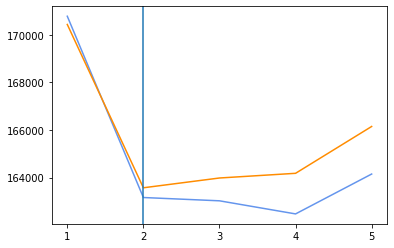

In [10]:
# solution
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

def PolynomialRegression(degree, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), 
                         LinearRegression(**kwargs))

def eval_models(y_pred, y_val) :
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)

    return mse, rmse, mae, r2

train_error = [] 
val_error = []

for i in degrees:
  poly_ols = PolynomialRegression(degree=i)
  poly_ols.fit(X_train, y_train)
  y_train_pred_poly = poly_ols.predict(X_train)
  y_val_pred_poly = poly_ols.predict(X_val)
  print(f"degree {i}", eval_models(y_val_pred_poly, y_val))

  train_error.append(eval_models(y_train_pred_poly, y_train)[2]) # mae
  val_error.append(eval_models(y_val_pred_poly, y_val)[2]) # mae

# mse, rmse, mae >> find the index of the min error value + 1
best_degree = int(val_error.index(min(val_error)))+1 
print("best degree :", best_degree)

plt.plot(train_error, color='#6495ED');
plt.plot(val_error, color='#FF8C00');
plt.xticks(range(len(degrees)), labels=degrees);
plt.axvline(best_degree - 1);

degree 1 (65548488927.29533, 256024.39127414272, 170429.06744043276, 0.4819386780307512)
degree 2 (62903090387.49583, 250804.88509495946, 163571.37257225608, 0.5028465385641061)
degree 3 (63818339359.14725, 252622.91930691333, 163982.1778124932, 0.49561288451739494)
degree 4 (68310971961.07161, 261363.6775856041, 164179.12292014298, 0.46010544227175243)
degree 5 (73606192461.49886, 271304.61194292083, 166145.79705191738, 0.418254760776825)
best degree : 2


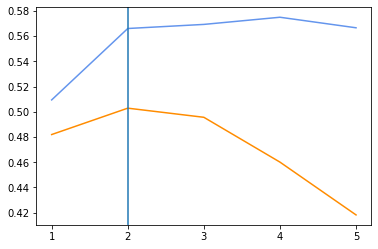

In [11]:
# r2_score
train_error = [] 
val_error = []
best_degree = None

for i in degrees:
  poly_ols = PolynomialRegression(degree=i)
  poly_ols.fit(X_train, y_train)
  y_train_pred_poly = poly_ols.predict(X_train)
  y_val_pred_poly = poly_ols.predict(X_val)
  print(f"degree {i}", eval_models(y_val_pred_poly, y_val))

  train_error.append(eval_models(y_train_pred_poly, y_train)[3]) # r2_score
  val_error.append(eval_models(y_val_pred_poly, y_val)[3]) # r2_score

best_degree = int(val_error.index(max(val_error))) + 1
# r2_score >>  find the index of the max score value + 1
print("best degree :", best_degree)

plt.plot(train_error, color='#6495ED');
plt.plot(val_error, color='#FF8C00');
plt.xticks(range(len(degrees)), labels=degrees);
plt.axvline(best_degree - 1);

## **Part 3. Generalization**

### **3-1. 일반화**

- **`Test Set`**을 딱 한 번만 사용해서 모델의 **`일반화`** 성능을 확인하세요.
  - 학습시킨 다항선형회귀 모델의 **`훈련 점수와 테스트 점수`**를 구해보세요.

##### **Q5. MAE를 사용한 테스트 점수와 훈련 점수의 차를 구하고 제출하세요. (소수점 아래 2자리까지)**


In [12]:
poly_ols = PolynomialRegression(degree=best_degree)
poly_ols.fit(X_train, y_train)
y_train_pred_poly = poly_ols.predict(X_train)
y_test_pred_poly = poly_ols.predict(X_test)

train_score = eval_models(y_train_pred_poly, y_train)[2]
test_score = eval_models(y_test_pred_poly, y_test)[2]
print("train_score :", train_score, "\n",
      "test_score :", test_score)

train_score : 163162.69103260152 
 test_score : 166281.6792674509


In [13]:
print("테스트 점수와 훈련 점수의 차 :", round(test_score - train_score, 2))

테스트 점수와 훈련 점수의 차 : 3118.99


# 🥇 **도전 과제**

- **과제에서 만든 모델의 성능을 개선해보세요.**
    - **`EDA`**를 통해 추가로 학습에 사용할 특성을 찾고 모델을 새로 학습해보세요.
    - 여러분의 다양한 아이디어로 **`특성 공학(Feature Engineering)`**을 수행해 볼 수도 있습니다.
    - 마지막에 모델 성능의 개선 여부와 왜 그 결과가 나왔는지에 대한 **`인사이트`**를 공유해주세요.
